<a href="https://colab.research.google.com/github/Eranga035225/Dog-cat_classifier-using-CNN/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [7]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: erangakavishanka 
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:00<00:00, 721MB/s] 

In [8]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [9]:
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"

In [10]:


train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [11]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [12]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape),
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


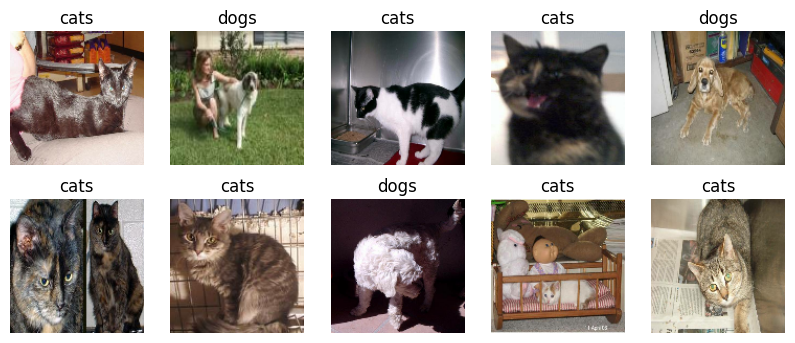

In [13]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [15]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[ 38.55078     21.550781    31.550781  ]
   [ 39.90625     22.90625     32.90625   ]
   [ 36.6875      19.6875      29.6875    ]
   ...
   [  0.           1.           0.        ]
   [  0.           0.           0.        ]
   [  0.           0.           0.        ]]

  [[ 38.44922     21.449219    31.449219  ]
   [ 37.328125    20.328125    30.328125  ]
   [ 35.32422     18.324219    28.324219  ]
   ...
   [  0.           0.           0.        ]
   [  0.           0.32421875   0.        ]
   [  0.           0.           0.        ]]

  [[ 39.987534    22.987534    32.987534  ]
   [ 38.27568     21.27568     31.27568   ]
   [ 38.039062    21.039062    31.039062  ]
   ...
   [  1.           0.           0.        ]
   [  0.           1.           0.        ]
   [  0.           0.           0.        ]]

  ...

  [[184.55377    171.84134    185.32405   ]
   [191.96484    179.41348    193.68916   ]
   [197.16423    183.4764     196.32031   ]
   ...
   [ 12.           1.   

In [16]:

train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [17]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.33361313 0.3732118  0.46510825]
   [0.28804237 0.20327064 0.37857547]
   [0.3038884  0.16342941 0.37726966]
   ...
   [0.5541973  0.39748776 0.3320772 ]
   [0.54515934 0.3999081  0.337163  ]
   [0.53333336 0.40392157 0.3372549 ]]

  [[0.35903955 0.42570156 0.45473346]
   [0.33983907 0.2941083  0.4078691 ]
   [0.2924788  0.16569453 0.35958216]
   ...
   [0.5516391  0.4040288  0.33469668]
   [0.55417734 0.41420168 0.34738782]
   [0.5462929  0.4168811  0.34748775]]

  [[0.37059075 0.44638732 0.4476997 ]
   [0.36649793 0.38684884 0.43119627]
   [0.31189275 0.24541698 0.38218993]
   ...
   [0.551011   0.40784314 0.33628982]
   [0.5431222  0.41754007 0.3352484 ]
   [0.54509807 0.41960785 0.33532476]]

  ...

  [[0.8127298  0.7617494  0.73822   ]
   [0.8147212  0.7676624  0.72054225]
   [0.8104905  0.76343167 0.7085297 ]
   ...
   [0.8097607  0.7823097  0.75093716]
   [0.8090001  0.78933096 0.76578647]
   [0.79248106 0.7728732  0.75520056]]

  [[0.80693775 0.75595737 0.732427

In [18]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [21]:

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [22]:

start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.5406 - loss: 0.7064 - val_accuracy: 0.5838 - val_loss: 0.6625
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.6089 - loss: 0.6578 - val_accuracy: 0.5987 - val_loss: 0.6643
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6459 - loss: 0.6320 - val_accuracy: 0.6650 - val_loss: 0.6281
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6614 - loss: 0.6206 - val_accuracy: 0.5350 - val_loss: 0.8192
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6609 - loss: 0.6081 - val_accuracy: 0.6600 - val_loss: 0.6087
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.6700 - loss: 0.5984 - val_accuracy: 0.7163 - val_loss: 0.5755
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6835 - loss: 0.5827 - val_accuracy: 0.7312 - val_loss: 0.5593
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.7057 - loss: 0.5629 - val_acc

In [23]:
history.history

{'accuracy': [0.5706944465637207,
  0.6143055558204651,
  0.6463888883590698,
  0.6626389026641846,
  0.679722249507904,
  0.6755555272102356,
  0.6906944513320923,
  0.7108333110809326,
  0.7259722352027893,
  0.7334722280502319,
  0.7363888621330261,
  0.7534722089767456,
  0.7506944537162781,
  0.7548611164093018,
  0.7563889026641846,
  0.7673611044883728,
  0.7730555534362793,
  0.7723610997200012,
  0.7774999737739563,
  0.7870833277702332],
 'loss': [0.6804320812225342,
  0.6535527110099792,
  0.6270748376846313,
  0.6127665638923645,
  0.5939350724220276,
  0.5936258435249329,
  0.5754398703575134,
  0.5555362105369568,
  0.5423917770385742,
  0.5269601345062256,
  0.5177938342094421,
  0.507427453994751,
  0.5042971968650818,
  0.4943540394306183,
  0.486327588558197,
  0.479727178812027,
  0.4769767224788666,
  0.46504783630371094,
  0.4569445848464966,
  0.45033442974090576],
 'val_accuracy': [0.5837500095367432,
  0.5987499952316284,
  0.6650000214576721,
  0.53500002622604

In [24]:

print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 184.627 seconds


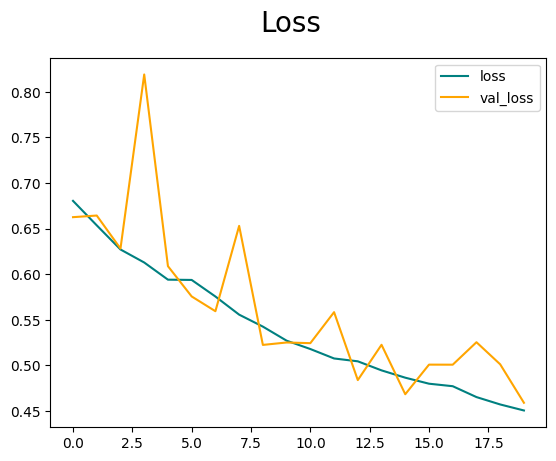

In [25]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()


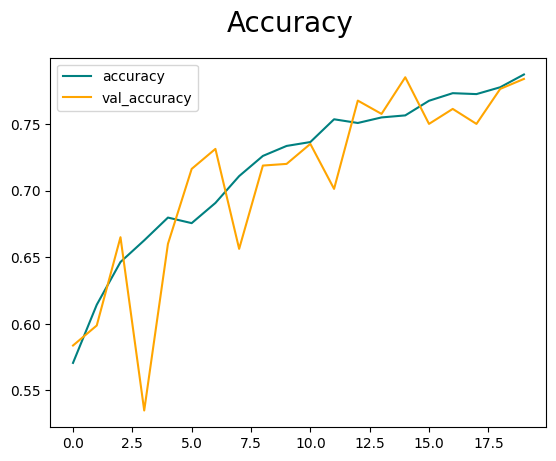

In [26]:

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [27]:

precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [28]:


for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

In [29]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7862433791160583>

In [30]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7429999709129333>

In [32]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7705000042915344>

In [34]:
import cv2

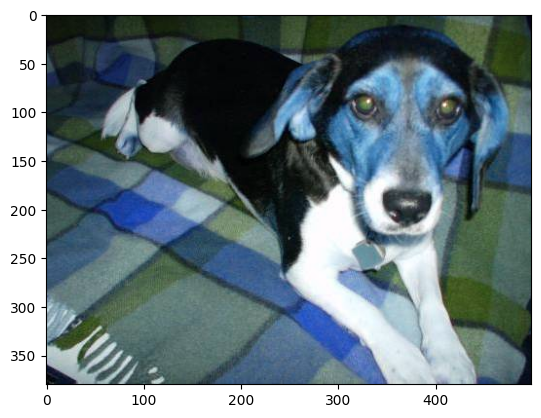

In [56]:
img = cv2.imread("/content/cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4058.jpg")
plt.imshow(img)
plt.show()

In [57]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [58]:
np.expand_dims(scaled_image,0).shape

(1, 128, 128, 3)

In [59]:
y_hat = model.predict(np.expand_dims(scaled_image,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [60]:
y_hat

array([[0.64465404]], dtype=float32)

In [61]:
class_names

['cats', 'dogs']

In [62]:
if y_hat >= 0.5:
  print(class_names[1])
else:
  print(class_names[0])

dogs
